<a href="https://colab.research.google.com/github/jjaime0502/Actividad_5/blob/main/Actividad5(California)_Equipo7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import seaborn as sns
model1=LinearRegression()

In [ ]:
#Cargar un archivo
df=pd.read_csv("California_EUA.csv",error_bad_lines=False)
df.set_index("id", inplace=True)

<ipython-input-3-38e98849e2cb>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df=pd.read_csv("California_EUA.csv",error_bad_lines=False)


In [ ]:
df

,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
9.580000e+02,https://www.airbnb.com/rooms/958,2.020000e+13,06/03/2023,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Our bright garden unit overlooks a lovely back...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,1169,https://www.airbnb.com/users/show/1169,...,4.88,4.98,4.76,City Registration Pending,f,1,1,0,0,2.31
5.858000e+03,https://www.airbnb.com/rooms/5858,2.020000e+13,06/03/2023,city scrape,Creative Sanctuary,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,8904,https://www.airbnb.com/users/show/8904,...,4.85,4.77,4.68,NaN,f,1,1,0,0,0.66
8.142000e+03,https://www.airbnb.com/rooms/8142,2.020000e+13,06/03/2023,city scrape,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"N Juda Muni, Bus and UCSF Shuttle.<br /><br />...",https://a0.muscache.com/pictures/12d8bff0-1698...,21994,https://www.airbnb.com/users/show/21994,...,4.78,4.67,4.67,NaN,f,13,0,13,0,0.09
8.339000e+03,https://www.airbnb.com/rooms/8339,2.020000e+13,06/03/2023,city scrape,Historic Alamo Square Victorian,Pls email before booking. <br />Interior featu...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,24215,https://www.airbnb.com/users/show/24215,...,5.00,4.94,4.75,STR-0000264,f,2,2,0,0,0.17
8.739000e+03,https://www.airbnb.com/rooms/8739,2.020000e+13,06/03/2023,city scrape,"Mission Sunshine, with Private Bath","Welcome to ""The Mission,"" the sunniest neighbo...",Located between Valencia Street and Dolores Pa...,https://a0.muscache.com/pictures/80811/7a57d0e...,7149,https://www.airbnb.com/users/show/7149,...,4.96,4.93,4.74,STR-0000028,f,2,0,2,0,4.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8.180000e+17,https://www.airbnb.com/rooms/818195233784141985,2.020000e+13,06/03/2023,city scrape,Powell Place Studio on Nob Hill,Situated in the prestigious Nob Hill section o...,Powell Place is surrounded by everything that ...,https://a0.muscache.com/pictures/miso/Hosting-...,495900269,https://www.airbnb.com/users/show/495900269,...,NaN,NaN,NaN,147904,t,5,5,0,0,NaN
8.180000e+17,https://www.airbnb.com/rooms/818231243893035313,2.020000e+13,06/03/2023,city scrape,â€¢ Cozy & Comfortable Castro Artist's Studio â€¢,You'll be in the perfect location to explore a...,"Lively and safe neighborhood, with a local lib...",https://a0.muscache.com/pictures/miso/Hosting-...,499392537,https://www.airbnb.com/users/show/499392537,...,5.00,5.00,5.00,2023-001477STR,f,1,1,0,0,1.00
8.180000e+17,https://www.airbnb.com/rooms/818396267693629070,2.020000e+13,06/03/2023,city scrape,Heart of SF ! Close by to Everything,- In-unit washer/dryer<br />-Walk-in Closet <b...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,499294716,https://www.airbnb.com/users/show/499294716,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN


In [ ]:
#Obtenemps información
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 6936 entries, 958.0 to 8.19e+17
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   listing_url                                   6936 non-null   object 
 1   scrape_id                                     6936 non-null   float64
 2   last_scraped                                  6936 non-null   object 
 3   source                                        6936 non-null   object 
 4   name                                          6936 non-null   object 
 5   description                                   6889 non-null   object 
 6   neighborhood_overview                         4850 non-null   object 
 7   picture_url                                   6936 non-null   object 
 8   host_id                                       6936 non-null   int64  
 9   host_url                                      6936 no

In [ ]:
#Sacamos una copia del df
df2=df.copy()
df2.head(3)

,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
958.0,https://www.airbnb.com/rooms/958,2.020000e+13,06/03/2023,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Our bright garden unit overlooks a lovely back...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,1169,https://www.airbnb.com/users/show/1169,...,4.88,4.98,4.76,City Registration Pending,f,1,1,0,0,2.31
5858.0,https://www.airbnb.com/rooms/5858,2.020000e+13,06/03/2023,city scrape,Creative Sanctuary,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,8904,https://www.airbnb.com/users/show/8904,...,4.85,4.77,4.68,NaN,f,1,1,0,0,0.66
8142.0,https://www.airbnb.com/rooms/8142,2.020000e+13,06/03/2023,city scrape,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"N Juda Muni, Bus and UCSF Shuttle.<br /><br />...",https://a0.muscache.com/pictures/12d8bff0-1698...,21994,https://www.airbnb.com/users/show/21994,...,4.78,4.67,4.67,NaN,f,13,0,13,0,0.09


In [ ]:
#Convertimos host_response_rate,host_acceptance_rate y price a tipo float
df2['host_response_rate'] = df2['host_response_rate'].str.replace('%', '').astype(float)
df2['host_acceptance_rate'] = df2['host_acceptance_rate'].str.replace('%', '').astype(float)
df2['price'] = df2['price'].str.replace(',', '')
df2['price'] = df2['price'].str.replace('$', '').astype(float)

#Se eliminan columnas vacias que solo tienen valores nulos
df2.drop(columns=['neighbourhood_group_cleansed', 'bathrooms','calendar_updated','license',], inplace=True)



<ipython-input-7-265543438bfc>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2['price'] = df2['price'].str.replace('$', '').astype(float)


In [ ]:
#Se identifican valores nulos del df2
df2.isnull().sum()

listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
name                                               0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               1325
Length: 70, dtype: int64

In [ ]:
#Se seleccionan todas las columnas tipo object
df2_objet= df2.select_dtypes(include=['object'])
df2_objet.head(3)

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,...,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
id,,,,,,,,,,,,,,,,,,,,,
958.0,https://www.airbnb.com/rooms/958,06/03/2023,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Our bright garden unit overlooks a lovely back...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,https://www.airbnb.com/users/show/1169,Holly,31/07/2008,...,Western Addition,Entire serviced apartment,Entire home/apt,1 bath,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",t,06/03/2023,23/07/2009,19/02/2023,f
5858.0,https://www.airbnb.com/rooms/5858,06/03/2023,city scrape,Creative Sanctuary,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,https://www.airbnb.com/users/show/8904,Philip And Tania,02/03/2009,...,Bernal Heights,Entire rental unit,Entire home/apt,1 bath,"[""Essentials"", ""Carbon monoxide alarm"", ""Hange...",t,06/03/2023,03/05/2009,06/08/2017,f
8142.0,https://www.airbnb.com/rooms/8142,06/03/2023,city scrape,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"N Juda Muni, Bus and UCSF Shuttle.<br /><br />...",https://a0.muscache.com/pictures/12d8bff0-1698...,https://www.airbnb.com/users/show/21994,Aaron,17/06/2009,...,Haight Ashbury,Private room in rental unit,Private room,4 shared baths,"[""Security cameras on property"", ""Host greets ...",t,06/03/2023,08/09/2014,27/10/2022,f


In [ ]:
#Se identifican y sustituyen los valores nulos tipo object por "Unknow"
df2_objet=df2_objet.fillna("Unknow")
df2_objet.isnull().sum().sum()

0

In [ ]:
#Se seleccionan todas las columnas tipo int y float
pd.set_option('display.max_columns', None)
df2_numeric= df2.select_dtypes(include=['int', 'float'])
df2_numeric.head(3)

,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
958.0,2.020000e+13,1169,100.0,100.0,1,1,37.77028,-122.43317,3,1.0,2.0,202.0,2,30,2.0,2.0,1125.0,1125.0,2.0,1125.0,8,22,30,128,383,59,4,4.87,4.93,4.92,4.95,4.88,4.98,4.76,1,1,0,0,2.31
5858.0,2.020000e+13,8904,80.0,71.0,2,2,37.74474,-122.42089,4,2.0,2.0,235.0,30,60,30.0,30.0,60.0,60.0,30.0,60.0,30,60,90,365,111,0,0,4.88,4.85,4.87,4.89,4.85,4.77,4.68,1,1,0,0,0.66
8142.0,2.020000e+13,21994,100.0,73.0,13,14,37.76555,-122.45213,1,1.0,1.0,56.0,32,90,32.0,32.0,90.0,90.0,32.0,90.0,30,60,90,365,9,1,0,4.67,4.44,4.44,4.78,4.78,4.67,4.67,13,0,13,0,0.09


In [ ]:
df2_numeric.isnull().sum()

scrape_id                                          0
host_id                                            0
host_response_rate                              1019
host_acceptance_rate                             801
host_listings_count                                0
host_total_listings_count                          0
latitude                                           0
longitude                                          0
accommodates                                       0
bedrooms                                         945
beds                                             120
price                                              0
minimum_nights                                     0
maximum_nights                                     0
minimum_minimum_nights                             2
maximum_minimum_nights                             2
minimum_maximum_nights                             2
maximum_maximum_nights                             2
minimum_nights_avg_ntm                        

In [ ]:
#Se sustituyen las siguientes columnas por la media
df2_numeric["host_response_rate"]=df2_numeric["host_response_rate"].fillna(round(df2_numeric["host_response_rate"].mean(),1))
df2_numeric["host_acceptance_rate"]=df2_numeric["host_acceptance_rate"].fillna(round(df2_numeric["host_acceptance_rate"].mean(),1))

df2_numeric["review_scores_rating"]=df2_numeric["review_scores_rating"].fillna(round(df2_numeric["review_scores_rating"].mean(),1))
df2_numeric["review_scores_accuracy"]=df2_numeric["review_scores_accuracy"].fillna(round(df2_numeric["review_scores_accuracy"].mean(),1))
df2_numeric["review_scores_cleanliness"]=df2_numeric["review_scores_cleanliness"].fillna(round(df2_numeric["review_scores_cleanliness"].mean(),1))
df2_numeric["review_scores_checkin"]=df2_numeric["review_scores_checkin"].fillna(round(df2_numeric["review_scores_checkin"].mean(),1))
df2_numeric["review_scores_communication"]=df2_numeric["review_scores_communication"].fillna(round(df2_numeric["review_scores_communication"].mean(),1))
df2_numeric["review_scores_location"]=df2_numeric["review_scores_location"].fillna(round(df2_numeric["review_scores_location"].mean(),1))
df2_numeric["review_scores_value"]=df2_numeric["review_scores_value"].fillna(round(df2_numeric["review_scores_value"].mean(),1))
df2_numeric["reviews_per_month"]=df2_numeric["reviews_per_month"].fillna(round(df2_numeric["reviews_per_month"].mean(),1))

#Se sustituyen las siguientes columnas por la mediana
df2_numeric["minimum_minimum_nights"]=df2_numeric["minimum_minimum_nights"].fillna(round(df2_numeric["minimum_minimum_nights"].median(),1))
df2_numeric["maximum_minimum_nights"]=df2_numeric["maximum_minimum_nights"].fillna(round(df2_numeric["maximum_minimum_nights"].median(),1))
df2_numeric["minimum_maximum_nights"]=df2_numeric["minimum_maximum_nights"].fillna(round(df2_numeric["minimum_maximum_nights"].median(),1))
df2_numeric["maximum_maximum_nights"]=df2_numeric["maximum_maximum_nights"].fillna(round(df2_numeric["maximum_maximum_nights"].median(),1))
df2_numeric["minimum_nights_avg_ntm"]=df2_numeric["minimum_nights_avg_ntm"].fillna(round(df2_numeric["minimum_nights_avg_ntm"].median(),1))
df2_numeric["maximum_nights_avg_ntm"]=df2_numeric["maximum_nights_avg_ntm"].fillna(round(df2_numeric["maximum_nights_avg_ntm"].median(),1))

#Se sustituyen las siguientes columnas por el método foward fill
df2_numeric["bedrooms"]=df2_numeric["bedrooms"].fillna(method="ffill")
df2_numeric["beds"]=df2_numeric["beds"].fillna(method="ffill")

#Verificamos valores nulos
df2_numeric.isnull().sum()

scrape_id                                       0
host_id                                         0
host_response_rate                              0
host_acceptance_rate                            0
host_listings_count                             0
host_total_listings_count                       0
latitude                                        0
longitude                                       0
accommodates                                    0
bedrooms                                        0
beds                                            0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0
minimum_maximum_nights                          0
maximum_maximum_nights                          0
minimum_nights_avg_ntm                          0
maximum_nights_avg_ntm                          0


# **Sustitución de outliers**

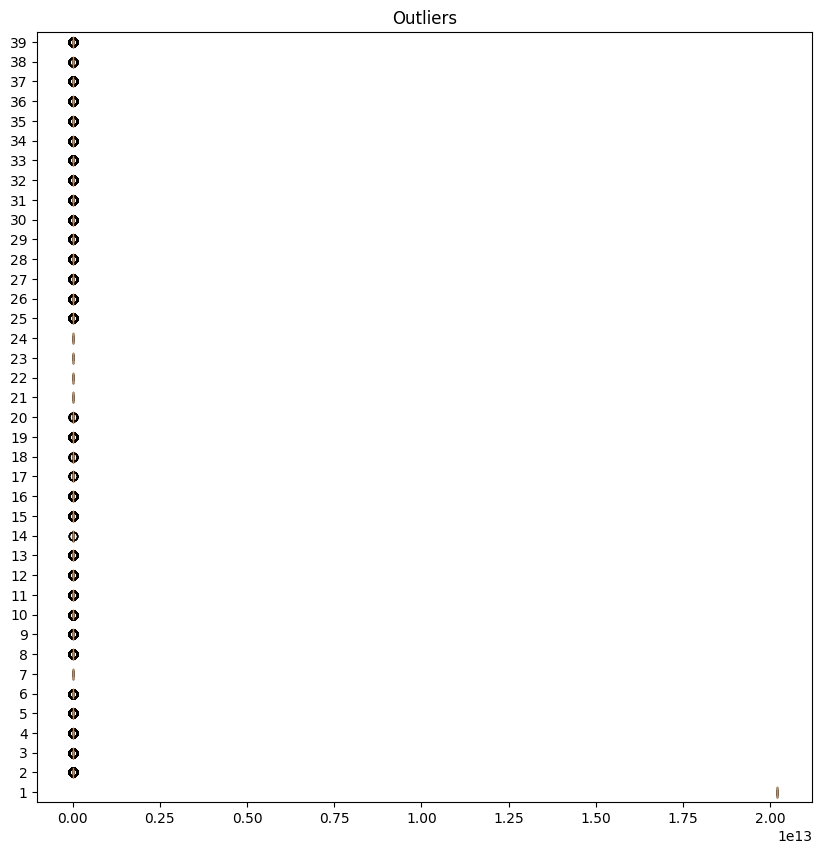

In [ ]:
fig=plt.figure(figsize=(10,10))
plt.boxplot(df2_numeric,vert=False)
plt.title("Outliers")
plt.show()

In [ ]:
#Aplicación de desviación estandar
y=df2_numeric
limite_superior=y.mean()+2.5*y.std()
limite_inferior=y.mean()-2.5*y.std()

print("Limite superior: ",limite_superior)
print("Limite inferior: ",limite_inferior)


Limite superior:  scrape_id                                       2.020000e+13
host_id                                         4.659278e+08
host_response_rate                              1.312269e+02
host_acceptance_rate                            1.370941e+02
host_listings_count                             1.942276e+03
host_total_listings_count                       2.400409e+03
latitude                                        3.782569e+01
longitude                                      -1.223614e+02
accommodates                                    8.065278e+00
bedrooms                                        3.792757e+00
beds                                            4.806996e+00
price                                           3.511073e+03
minimum_nights                                  1.500103e+02
maximum_nights                                  3.061541e+04
minimum_minimum_nights                          1.669862e+02
maximum_minimum_nights                          2.053200e+02
minimu

In [ ]:
#Obtenemos los valores atípicos
#Al analizar los datos vemos que los datos aunque sean nulos corresponden
#por lo que no se hara sustitución de nulos.
atipicos = df2_numeric[(y > limite_superior)|(y < limite_inferior)]

In [ ]:
df_clean= pd.concat([df2_objet, df2_numeric], axis=1)

In [ ]:
df_clean

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9.580000e+02,https://www.airbnb.com/rooms/958,06/03/2023,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Our bright garden unit overlooks a lovely back...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,https://www.airbnb.com/users/show/1169,Holly,31/07/2008,"San Francisco, CA",We are a family of four that live upstairs. W...,within an hour,t,https://a0.muscache.com/im/pictures/user/efdad...,https://a0.muscache.com/im/pictures/user/efdad...,Duboce Triangle,"['email', 'phone']",t,t,"San Francisco, California, United States",Western Addition,Entire serviced apartment,Entire home/apt,1 bath,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",t,06/03/2023,23/07/2009,19/02/2023,f,2.020000e+13,1169,100.0,100.0,1,1,37.770280,-122.433170,3,1.0,2.0,202.0,2,30,2.0,2.0,1125.0,1125.0,2.0,1125.0,8,22,30,128,383,59,4,4.87,4.93,4.92,4.95,4.88,4.98,4.76,1,1,0,0,2.31
5.858000e+03,https://www.airbnb.com/rooms/5858,06/03/2023,city scrape,Creative Sanctuary,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,https://www.airbnb.com/users/show/8904,Philip And Tania,02/03/2009,"San Francisco, CA",Philip: English transplant to the Bay Area and...,within a few hours,f,https://a0.muscache.com/im/users/8904/profile_...,https://a0.muscache.com/im/users/8904/profile_...,Bernal Heights,"['email', 'phone', 'work_email']",t,t,"San Francisco, California, United States",Bernal Heights,Entire rental unit,Entire home/apt,1 bath,"[""Essentials"", ""Carbon monoxide alarm"", ""Hange...",t,06/03/2023,03/05/2009,06/08/2017,f,2.020000e+13,8904,80.0,71.0,2,2,37.744740,-122.420890,4,2.0,2.0,235.0,30,60,30.0,30.0,60.0,60.0,30.0,60.0,30,60,90,365,111,0,0,4.88,4.85,4.87,4.89,4.85,4.77,4.68,1,1,0,0,0.66
8.142000e+03,https://www.airbnb.com/rooms/8142,06/03/2023,city scrape,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"N Juda Muni, Bus and UCSF Shuttle.<br /><br />...",https://a0.muscache.com/pictures/12d8bff0-1698...,https://www.airbnb.com/users/show/21994,Aaron,17/06/2009,"San Francisco, CA",7 minutes walk to UCSF hospital & school campu...,within an hour,f,https://a0.muscache.com/im/users/21994/profile...,https://a0.muscache.com/im/users/21994/profile...,Cole Valley,"['email', 'phone']",t,t,"San Francisco, California, United States",Haight Ashbury,Private room in rental unit,Private room,4 shared baths,"[""Security cameras on property"", ""Host greets ...",t,06/03/2023,08/09/2014,27/10/2022,f,2.020000e+13,21994,100.0,73.0,13,14,37.765550,-122.452130,1,1.0,1

**COMPARACIÓN CON EL TIPO 'Private room' **

room_type = 'Private room'

In [ ]:
data_filtrado = df_clean[df_clean['room_type'] == 'Hotel room']
hotel_filtro= data_filtrado.loc[ : , ['room_type','host_acceptance_rate', 'host_response_rate', 'review_scores_location','review_scores_cleanliness','price','availability_365','number_of_reviews','reviews_per_month','review_scores_communication']]
hotel_filtro.set_index('room_type')

,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication
room_type,,,,,,,,,
Hotel room,100.0,99.0,4.88,4.59,98.0,124,354,3.51,4.82
Hotel room,100.0,99.0,4.84,4.56,129.0,157,263,2.78,4.73
Hotel room,92.0,100.0,5.00,5.00,250.0,155,34,0.37,4.97
Hotel room,100.0,99.0,3.88,4.53,91.0,171,18,0.24,4.59
Hotel room,100.0,80.0,4.75,4.38,119.0,284,8,0.17,4.50
Hotel room,100.0,80.0,5.00,4.67,9999.0,293,3,0.06,5.00
Hotel room,100.0,80.0,5.00,4.42,119.0,284,33,0.54,4.67
Hotel room,100.0,80.0,5.00,4.24,119.0,284,21,0.35,4.62
Hotel room,100.0,80.0,5.00,4.53,9999.0,293,19,0.31,4.47


**Análisis de correlación**

<ipython-input-20-4f6b7dd38bde>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_hotelroom = hotel_filtro.corr()


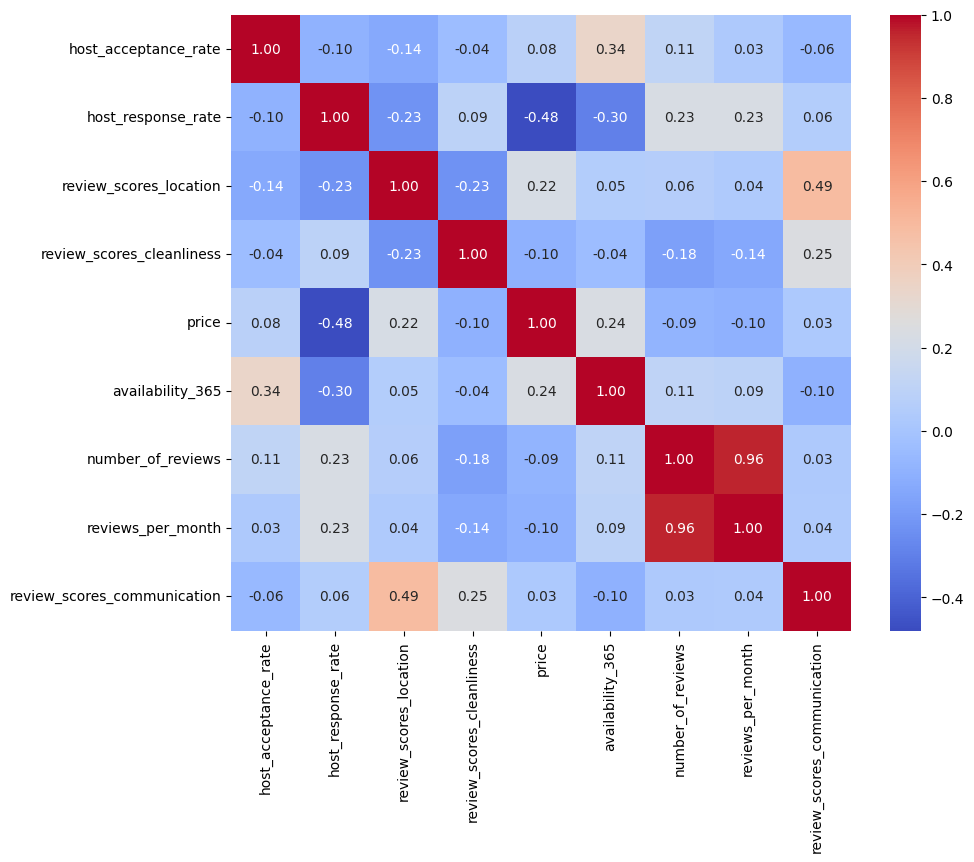

In [ ]:
correlation_hotelroom = hotel_filtro.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_hotelroom, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


In [ ]:
#A) “host_acceptance_rate" vs "host_response_rate”
correlation1 = hotel_filtro['host_acceptance_rate'].corr(hotel_filtro['host_response_rate'])
print(correlation1)

-0.09524982099105883


In [ ]:
#B) “host_acceptance_rate vs price”
correlation2 = hotel_filtro['host_acceptance_rate'].corr(hotel_filtro['price'])
print(correlation2)

0.08216871048731395


In [ ]:
#C) “host_acceptance_rate" vs "number_of_reviews ”
correlation3 = hotel_filtro['host_acceptance_rate'].corr(hotel_filtro['number_of_reviews'])
print(correlation3)

0.10991815654099783


In [ ]:
#D)“review_scores_location" vs "review_scores_cleanliness”
correlation4 = hotel_filtro['review_scores_location'].corr(hotel_filtro['review_scores_cleanliness'])
print(correlation4)

-0.23485883030017146


In [ ]:
#E)“availability_365" vs "number_of_reviews”
correlation5 = hotel_filtro['availability_365'].corr(hotel_filtro['number_of_reviews'])
print(correlation5)

0.10594607285845649


In [ ]:
#F)“reviews_per_month vs review_scores_communication”
correlation6 = hotel_filtro['reviews_per_month'].corr(hotel_filtro['review_scores_communication'])
print(correlation6)

0.038614871724157236


**Crear el modelo matemático utilizando la variable con mayor correlación.**

Variables con mayor correlación

“review_scores_location" vs "review_scores_cleanliness”

In [ ]:
Vars_Indep = hotel_filtro[['review_scores_cleanliness']]
Var_Dep=hotel_filtro['review_scores_location']
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.4289354]),
 'rank_': 1,
 'singular_': array([2.44622276]),
 'intercept_': 6.51301164996563}

Modelo matemático

y = 0.71790653x + 1.41489079217234

In [ ]:
y_pred=model.predict(X=hotel_filtro[['review_scores_cleanliness']])
y_pred

array([4.54419815, 4.55706621, 4.36833464, 4.56993428, 4.63427459,
       4.50988332, 4.61711717, 4.69432554, 4.56993428, 4.59995975,
       4.59138105, 4.61282782, 4.55706621, 4.36833464, 4.63856394,
       4.59995975, 4.5956704 , 4.58280234, 4.45412172, 4.36833464,
       5.22620544, 4.45412172, 4.36833464, 4.50988332, 4.39836012,
       4.47556849, 4.36833464, 4.36833464, 4.36833464, 4.40693882,
       4.36833464, 4.54848751, 4.56993428, 4.39836012, 4.46698978,
       4.56993428, 4.63427459, 4.57851298, 4.36833464, 4.54848751,
       4.64714265, 4.63856394, 4.76724456, 4.50559397, 4.54848751,
       4.36833464, 4.36833464, 4.36833464, 4.36833464, 4.45412172,
       4.45412172, 4.41122818])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
hotel_filtro.insert(0, 'Predicciones_scores_cleanliness', y_pred)
hotel_filtro

,Predicciones_scores_cleanliness,room_type,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication
id,,,,,,,,,,,
4631873.0,4.544198,Hotel room,100.0,99.0,4.88,4.59,98.0,124,354,3.51,4.82
6169292.0,4.557066,Hotel room,100.0,99.0,4.84,4.56,129.0,157,263,2.78,4.73
6883183.0,4.368335,Hotel room,92.0,100.0,5.00,5.00,250.0,155,34,0.37,4.97
16001051.0,4.569934,Hotel room,100.0,99.0,3.88,4.53,91.0,171,18,0.24,4.59
23271377.0,4.634275,Hotel room,100.0,80.0,4.75,4.38,119.0,284,8,0.17,4.50
23271459.0,4.509883,Hotel room,100.0,80.0,5.00,4.67,9999.0,293,3,0.06,5.00
23551086.0,4.617117,Hotel room,100.0,80.0,5.00,4.42,119.0,284,33,0.54,4.67
23551138.0,4.694326,Hotel room,100.0,80.0,5.00,4.24,119.0,284,21,0.35,4.62
23551287.0,4.569934,Hotel room,100.0,80.0,5.00,4.53,9999.0,293,19,0.31,4.47


<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

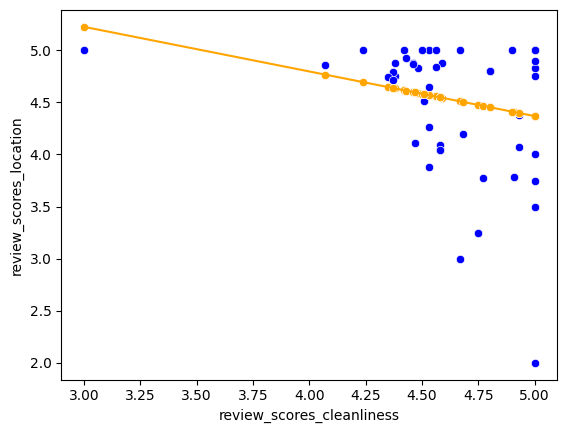

In [ ]:
#visualizamos la gráfica comparativa entrel total real y el total predecido
sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', color='blue', data=hotel_filtro)
sns.scatterplot(x='review_scores_cleanliness', y='Predicciones_scores_cleanliness', color='orange', data=hotel_filtro)
sns.lineplot(x='review_scores_cleanliness', y='Predicciones_scores_cleanliness', color='orange', data=hotel_filtro)

In [ ]:
#Comparación de ambas columnas
comparacion = hotel_filtro[['Predicciones_scores_cleanliness','review_scores_cleanliness']]
comparacion

,Predicciones_scores_cleanliness,review_scores_cleanliness
id,,
4631873.0,4.544198,4.59
6169292.0,4.557066,4.56
6883183.0,4.368335,5.00
16001051.0,4.569934,4.53
23271377.0,4.634275,4.38
23271459.0,4.509883,4.67
23551086.0,4.617117,4.42
23551138.0,4.694326,4.24
23551287.0,4.569934,4.53


In [ ]:
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.05515867016996512

In [ ]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.23485883030017227

**COMPARACIÓN CON EL TIPO 'Private room' **

room_type = 'Private room'

In [ ]:
data_filtrado2 = df_clean[df_clean['room_type'] == 'Private room']
private_filtro= data_filtrado2.loc[ : , ['room_type','host_acceptance_rate', 'host_response_rate', 'review_scores_location','review_scores_cleanliness','price','availability_365','number_of_reviews','reviews_per_month','review_scores_communication']]
private_filtro.set_index('room_type')

,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication
room_type,,,,,,,,,
Private room,73.0,100.0,4.67,4.44,56.0,365,9,0.09,4.78
Private room,90.0,100.0,4.93,4.94,110.0,159,770,4.65,4.96
Private room,67.0,100.0,4.77,4.75,100.0,331,80,0.74,4.78
Private room,100.0,100.0,4.14,5.00,95.0,365,19,0.12,5.00
Private room,100.0,100.0,4.82,4.45,55.0,55,121,0.85,4.81
...,...,...,...,...,...,...,...,...,...
Private room,98.0,100.0,5.00,5.00,80.0,316,1,1.00,5.00
Private room,97.0,100.0,4.80,4.80,40.0,336,0,1.30,4.90
Private room,100.0,100.0,4.80,4.80,56.0,339,0,1.30,4.90


***Análisis de Correlación***

<ipython-input-35-130b8e3f4776>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_privateroom = private_filtro.corr()


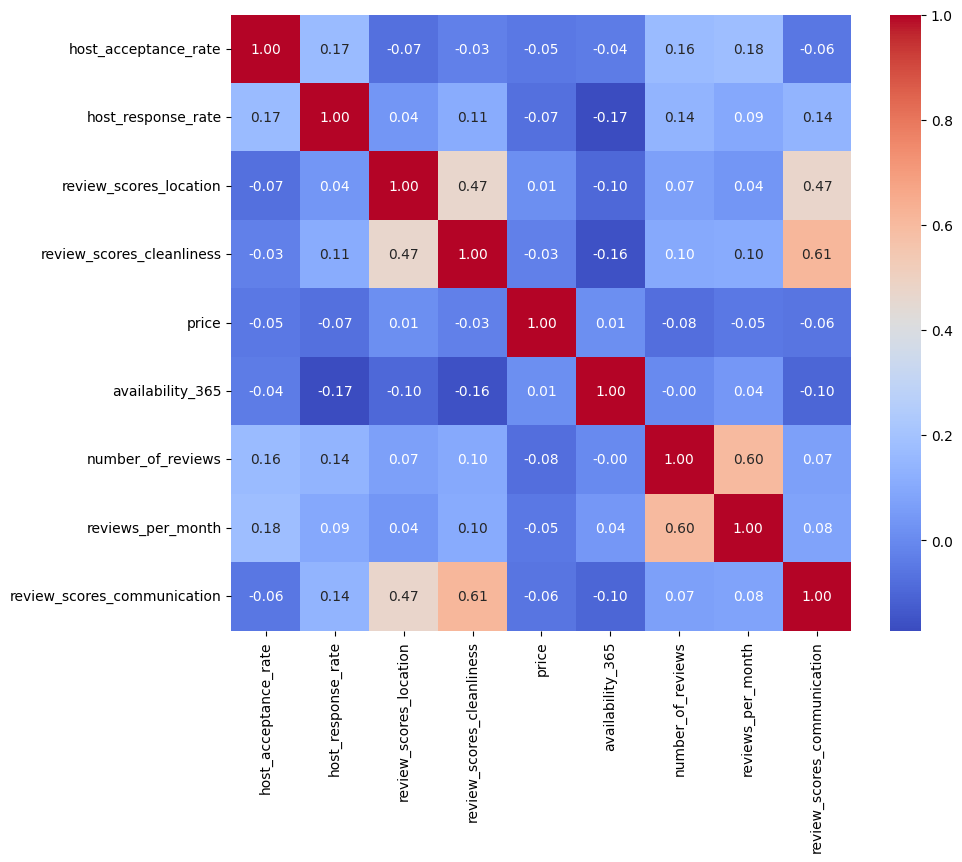

In [ ]:
correlation_privateroom = private_filtro.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_privateroom, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [ ]:
#A) “host_acceptance_rate" vs "host_response_rate”
correlation1priv = private_filtro['host_acceptance_rate'].corr(private_filtro['host_response_rate'])
print(correlation1priv)

0.1650838583876936


In [ ]:
#B) “host_acceptance_rate vs price”
correlation2priv = private_filtro['host_acceptance_rate'].corr(private_filtro['price'])
print(correlation2priv)

-0.05067379652779943


In [ ]:
#C) “host_acceptance_rate" vs "number_of_reviews ”
correlation3priv = private_filtro['host_acceptance_rate'].corr(private_filtro['number_of_reviews'])
print(correlation3priv)

0.16347833595716071


In [ ]:
#D)“review_scores_location" vs "review_scores_cleanliness”
correlation4priv = private_filtro['review_scores_location'].corr(private_filtro['review_scores_cleanliness'])
print(correlation4priv)

0.46642381574947583


In [ ]:
#E)“availability_365" vs "number_of_reviews”
correlation5priv = private_filtro['availability_365'].corr(private_filtro['number_of_reviews'])
print(correlation5priv)

-0.0019115339227198877


In [ ]:
#F)“reviews_per_month vs review_scores_communication”
correlation6priv = private_filtro['reviews_per_month'].corr(private_filtro['review_scores_communication'])
print(correlation6priv)

0.07639016217155639


**Crear el modelo matemático utilizando la variable con mayor correlación**

Variables con mayor correlación

“review_scores_location" vs "review_scores_cleanliness”

In [ ]:
Vars_Indep = private_filtro[['review_scores_cleanliness']]
Var_Dep=private_filtro['review_scores_location']
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.39550023]),
 'rank_': 1,
 'singular_': array([20.69251225]),
 'intercept_': 2.8968165529653}

Modelo Matemático


y = 0.65774895x + 1.7115836796097579

In [ ]:
y_pred=model.predict(X=private_filtro[['review_scores_cleanliness']])
y_pred

array([4.65283758, 4.85058769, 4.77544265, ..., 4.79521766, 4.79521766,
       4.79521766])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
private_filtro.insert(0, 'Predicciones_scores_cleanliness_privateroom', y_pred)
private_filtro

,Predicciones_scores_cleanliness_privateroom,room_type,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication
id,,,,,,,,,,,
8.142000e+03,4.652838,Private room,73.0,100.0,4.67,4.44,56.0,365,9,0.09,4.78
8.739000e+03,4.850588,Private room,90.0,100.0,4.93,4.94,110.0,159,770,4.65,4.96
4.909310e+05,4.775443,Private room,67.0,100.0,4.77,4.75,100.0,331,80,0.74,4.78
1.053700e+04,4.874318,Private room,100.0,100.0,4.14,5.00,95.0,365,19,0.12,5.00
1.449780e+05,4.656793,Private room,100.0,100.0,4.82,4.45,55.0,55,121,0.85,4.81
...,...,...,...,...,...,...,...,...,...,...,...
8.170000e+17,4.874318,Private room,98.0,100.0,5.00,5.00,80.0,316,1,1.00,5.00
8.180000e+17,4.795218,Private room,97.0,100.0,4.80,4.80,40.0,336,0,1.30,4.90
8.180000e+17,4.795218,Private room,100.0,100.0,4.80,4.80,56.0,339,0,1.30,4.90


<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

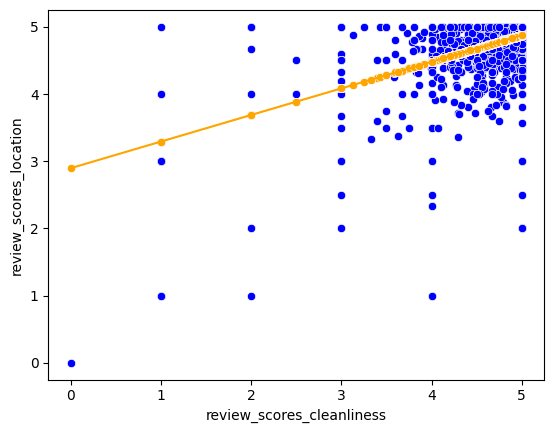

In [ ]:
#visualizamos la gráfica comparativa entrel total real y el total predecido
sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', color='blue', data=private_filtro)
sns.scatterplot(x='review_scores_cleanliness', y='Predicciones_scores_cleanliness_privateroom', color='orange', data=private_filtro)
sns.lineplot(x='review_scores_cleanliness', y='Predicciones_scores_cleanliness_privateroom', color='orange', data=private_filtro)

In [ ]:
#Comparación de ambas columnas
comparacion2 = private_filtro[['Predicciones_scores_cleanliness_privateroom','review_scores_cleanliness']]
comparacion2

,Predicciones_scores_cleanliness_privateroom,review_scores_cleanliness
id,,
8.142000e+03,4.652838,4.44
8.739000e+03,4.850588,4.94
4.909310e+05,4.775443,4.75
1.053700e+04,4.874318,5.00
1.449780e+05,4.656793,4.45
...,...,...
8.170000e+17,4.874318,5.00
8.180000e+17,4.795218,4.80
8.180000e+17,4.795218,4.80


In [ ]:
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.21755117589830097

In [ ]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.46642381574947583